In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import plot_tree
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv


In [3]:
#Import and display dataset
file = "/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv"
data = pd.read_csv(file)
data_copy = data
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
#Information on all variables in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
#Checking for missing values in each column
mis = (data.isnull().sum())
print(mis)

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [6]:
#Finding list of catagorical variables
s = (data.dtypes == "object")
cat_cols = list(s[s].index)
print(cat_cols)

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']


In [7]:
#Observing the number of unique values in each categorical feature
data['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [8]:
data['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [9]:
data['Exercise'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data['Heart_Disease'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
data['Skin_Cancer'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data['Other_Cancer'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
data['Depression'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data['Diabetes'].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [15]:
data['Arthritis'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
data['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
data['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [18]:
data['Smoking_History'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
#General_Health, Checkup and Diabetes need to have their observations edited so that they have
#no spaces. 

data["General_Health"].replace(" ", "_", regex = True, inplace = True)
data["Checkup"].replace(" ", "_", regex = True, inplace = True)
data["Diabetes"].replace(" ", "_", regex = True, inplace = True)
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within_the_past_2_years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very_Good,Within_the_past_year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very_Good,Within_the_past_year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within_the_past_year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within_the_past_year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [20]:
list(data.columns)


['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Smoking_History',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

In [42]:
#Summary of numerical variables in dataset
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


<Axes: >

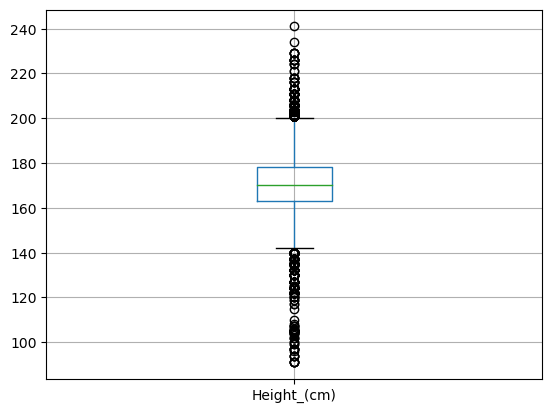

In [43]:
#Exploratory data analysis: Box Plot
data[["Height_(cm)"]].boxplot()

<Axes: >

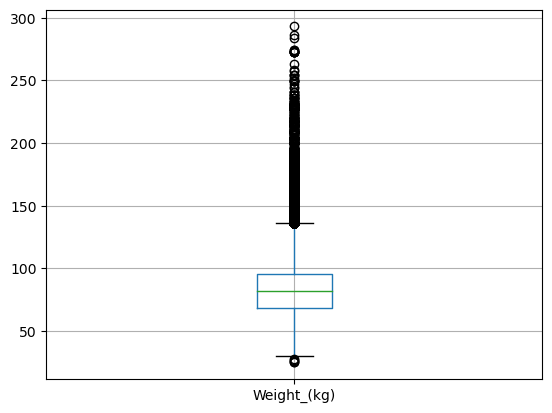

In [44]:
data[["Weight_(kg)"]].boxplot()

<Axes: >

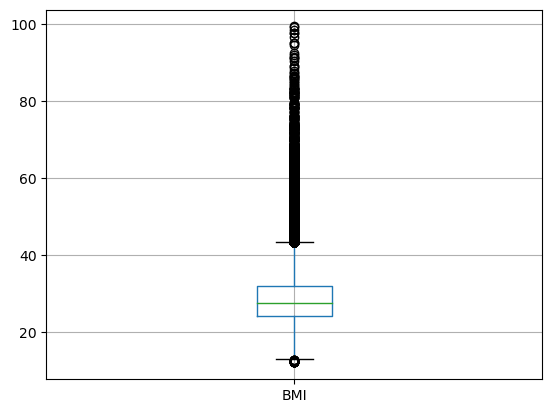

In [45]:
data[["BMI"]].boxplot()

<Axes: >

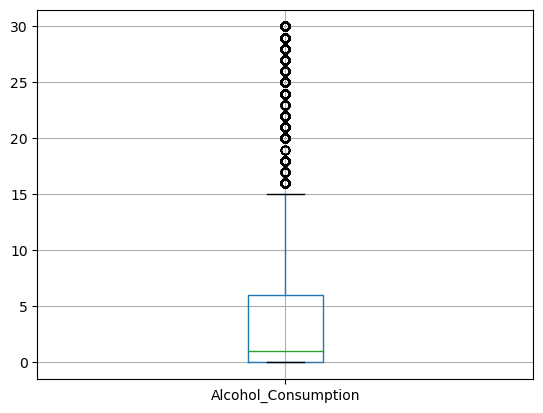

In [46]:
data[["Alcohol_Consumption"]].boxplot()

<Axes: >

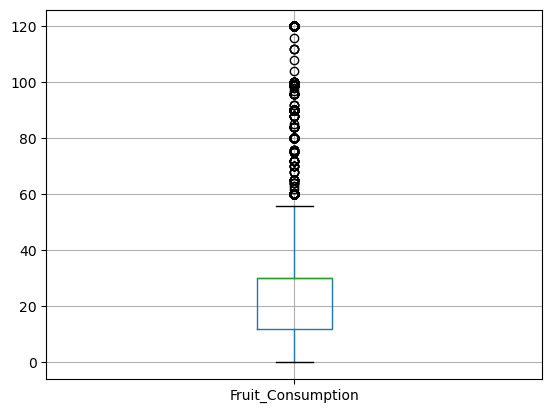

In [47]:
data[["Fruit_Consumption"]].boxplot()

<Axes: >

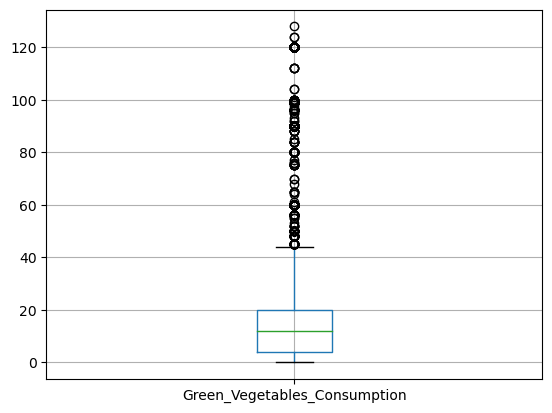

In [48]:
data[["Green_Vegetables_Consumption"]].boxplot()

<Axes: >

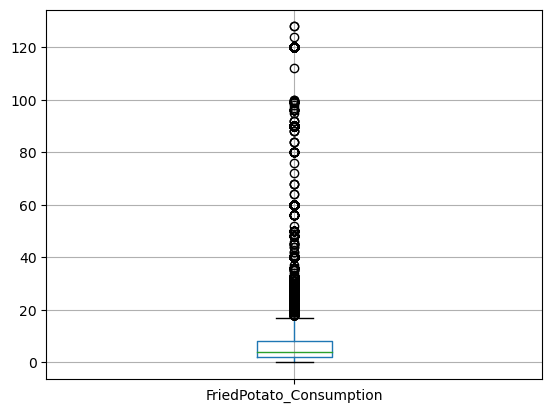

In [49]:
data[["FriedPotato_Consumption"]].boxplot()

In [50]:
#Correlation plot of all numerical explanatory variables
data.corr()

/tmp/ipykernel_32/525538780.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


In [21]:
#Seperating the dependent and independent variables into 'y' and 'X' variables, respectively.
X = data.drop("Heart_Disease", axis = 1).copy()
y = data['Heart_Disease'].copy()
X.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within_the_past_2_years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very_Good,Within_the_past_year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very_Good,Within_the_past_year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within_the_past_year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within_the_past_year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [22]:
#Encoding catagorical variables
X_encoded = pd.get_dummies(X, columns = ['General_Health', 
                                         'Checkup', 
                                         'Exercise', 
                                         'Skin_Cancer', 
                                         'Other_Cancer', 
                                         'Depression', 
                                         'Diabetes', 
                                         'Arthritis', 
                                         'Sex', 
                                         'Age_Category', 
                                         'Smoking_History'])
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 48 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          308854 non-null  float64
 1   Weight_(kg)                                          308854 non-null  float64
 2   BMI                                                  308854 non-null  float64
 3   Alcohol_Consumption                                  308854 non-null  float64
 4   Fruit_Consumption                                    308854 non-null  float64
 5   Green_Vegetables_Consumption                         308854 non-null  float64
 6   FriedPotato_Consumption                              308854 non-null  float64
 7   General_Health_Excellent                             308854 non-null  uint8  
 8   General_Health_Fair                                  3

In [23]:
#Making sure y only has two variables
y = data["Heart_Disease"]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 308854 entries, 0 to 308853
Series name: Heart_Disease
Non-Null Count   Dtype 
--------------   ----- 
308854 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [27]:
#Encoding the dependent variable
le = LabelEncoder()
le = le.fit(y)
le_y = le.transform(y)
le_y

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
#Splitting dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    le_y, 
                                                    random_state = 2023)

In [29]:
#Creating the XGBoost object
xgb = xgb.XGBClassifier()
eval_set = [(X_test, y_test)]

In [30]:
#Creating XGBoost model for training and predictions
model = xgb.fit(X_train, y_train,
                  eval_metric = "error", 
                  eval_set = eval_set, 
                  verbose = True,
                 early_stopping_rounds = 10)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.07934
[1]	validation_0-error:0.07887
[2]	validation_0-error:0.07872
[3]	validation_0-error:0.07877
[4]	validation_0-error:0.07877
[5]	validation_0-error:0.07888
[6]	validation_0-error:0.07888
[7]	validation_0-error:0.07886
[8]	validation_0-error:0.07887
[9]	validation_0-error:0.07887
[10]	validation_0-error:0.07888
[11]	validation_0-error:0.07882
[12]	validation_0-error:0.07873


In [39]:
#Generating predictions using the XGBoost model
y_pred = model.predict(X_test)

In [40]:
#Testing the accuracy of our model using the test dataset
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9212837050275857


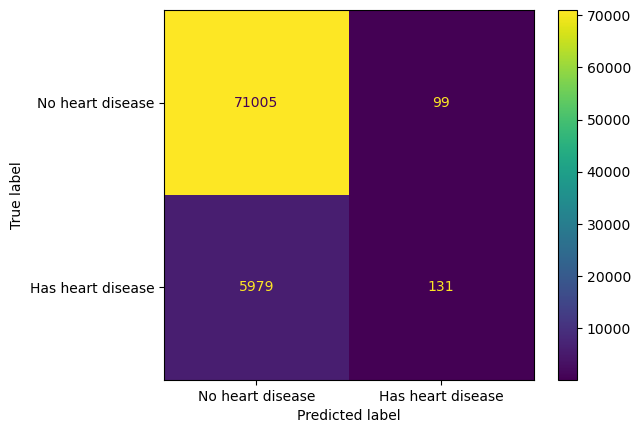

In [41]:
#Building a confusion matrix to display the performance of the model.
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No heart disease", "Has heart disease"])
cm_disp1.plot()